In [1]:
import os
import torch
from PIL import Image
import numpy as np
import torchvision.transforms as T
from matplotlib import pyplot as plt
#os.listdir('/dih4/dih4_2/wimlds/smajchrowska/checkpoint{epoch:04}.pth')

In [5]:
PATH = '/dih4/dih4_2/wimlds/smajchrowska/maskrcnn_RN50/checkpoint_20.pth'
IMG_NAME = '/dih4/dih4_2/wimlds/data/all_detect_images/dumped/99toMesVaOHKd8lOIZBVKS1MDPlXSPkTmdijxfiO.jpeg' # wszystko
NUM_CLASSES = 2
THRESHOLD = 0.8

In [6]:
CLASSES = ['Litter']

# standard PyTorch mean-std input image normalization
transform = T.Compose([
    T.ToTensor()
])

In [7]:
from train import get_instance_segmentation_model

model = get_instance_segmentation_model(NUM_CLASSES)

checkpoint = torch.load(PATH)
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

# read an image
im = Image.open(IMG_NAME).convert('RGB')

# mean-std normalize the input image (batch-size: 1)
img = transform(im).unsqueeze(0)

outputs = model(img)

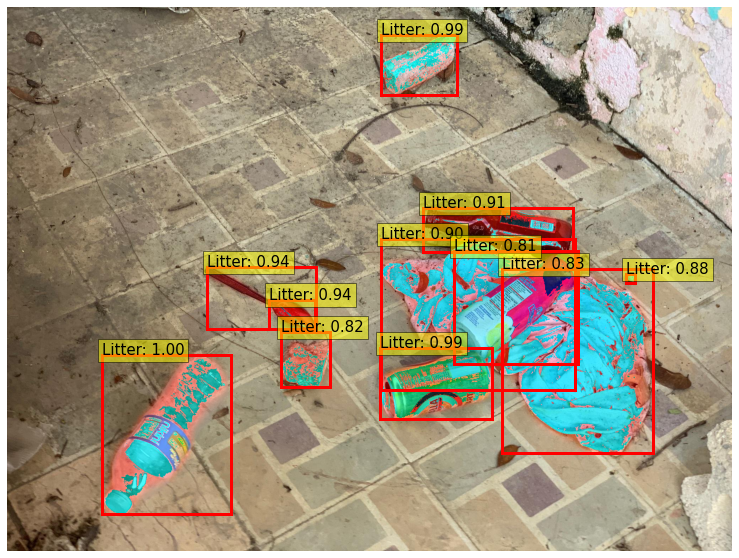

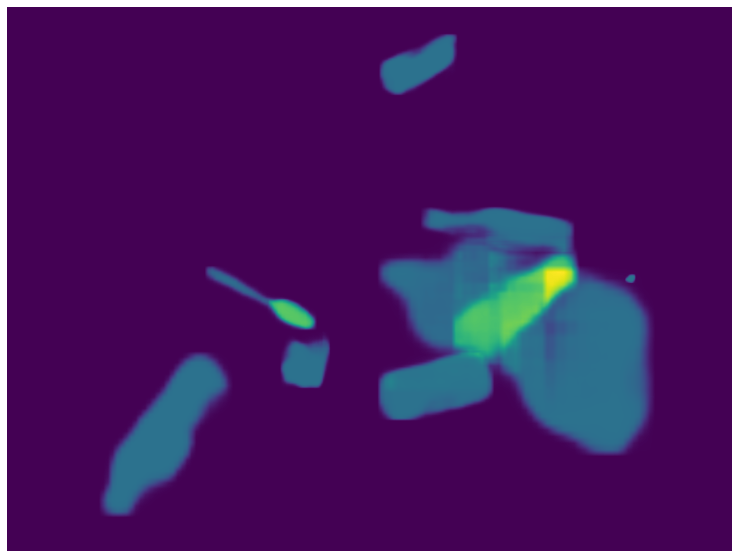

In [8]:
plt.figure(figsize=(16,10))
img = np.array(im)[:,:,1]
plt.imshow(im)
ax = plt.gca()
keep = outputs[0]['scores'].detach().numpy() > THRESHOLD
prob = outputs[0]['scores'].detach().numpy()[keep].tolist()
labels = outputs[0]['labels'].detach().numpy()[keep].tolist()
masks = outputs[0]['masks'].detach().numpy()[keep]

masking = np.zeros((1,)+img.shape)
for j, i in enumerate(outputs[0]['boxes'].detach().numpy()[keep].tolist()):
    p = prob[j]
    masking += masks[j]
    ax.add_patch(plt.Rectangle((i[0], i[1]), i[2] - i[0], i[3] - i[1],
                                   fill=False, color='r', linewidth=3))
    cl = int(labels[j])-1
    text = f'{CLASSES[cl]}: {p:0.2f}'
    ax.text(i[0], i[1], text, fontsize=15,
            bbox=dict(facecolor='yellow', alpha=0.5))

imagines = np.array(im)
imagines[:,:,0] = imagines[:,:,0] + masking[0,:,:]*100
plt.imshow(imagines)
plt.axis('off')
plt.show()

plt.figure(figsize=(16,10))
plt.imshow(masking[0,:,:])
plt.axis('off')
plt.show()